In [134]:
import pandas as pd
import bqplot
import numpy as np
import traitlets
import ipywidgets
import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
%matplotlib inline

# Data exploration

### This is a section I do not expected to be graded on. The steps here are mostly things to show the shapes and dimension of the data to help me plan out the approach. Regardsless, I thought it may be beneficial to leave them here as a record of my pattern of thinking.

In [135]:
bldgs = pd.read_csv("building_inventory.csv")

nsamples = 3000
#nsamples = 5000 # if needs be~~
downSampleMask = np.random.choice(range(len(bldgs)-1), 
                                  nsamples, replace=False)
bldgsDS = bldgs.loc[downSampleMask]
bldgsDS

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Bldg Status,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3
5727,Department of Corrections,Lincoln Correctional Center - Logan County,"R.r. #3, Box 549",Lincoln,62656,Logan,18,Darin M. LaHood,87,Butler Tim,...,In Use,1984,1984,420,3,3,0,Detention & Correc,Detention & Correc,Not provided
2206,Department of Natural Resources,Pere Marquette State Park - Jersey County,P.o. Box 158,Grafton,62037,Jersey,13,Rodney L. Davis,100,Davidsmeyer C. D.,...,In Use,1935,1935,261,1,1,0,Unusual,Unusual,Not provided
8205,Department of Human Services,IL School for the Visually Impaired - Jacksonv...,658 East State Street,Jacksonville,62650,Morgan,18,Darin M. LaHood,100,Davidsmeyer C. D.,...,In Use,1950,1950,10378,4,3,1,Assembly,Assembly,Not provided
4036,Department of Corrections,Dixon Correctional Center - Lee County,2600 North Brinton,Dixon,61201,Lee,16,Adam Kinzinger,90,Demmer Tom,...,In Use,1921,1921,9398,1,1,0,Detention & Correc,Business,Not provided
3285,Department of Natural Resources,White Pines Forest State Park - Ogle County,6712 West Pines Road,Mt Morris,61054,Ogle,16,Adam Kinzinger,90,Demmer Tom,...,In Use,1985,1985,20,1,1,0,Unusual,Unusual,Not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,Historic Preservation Agency,Albany Mounds State Historic Site,12th Ave & Cherry Street,Albany,61230,Whiteside,17,Cheri Bustos,71,McCombie Tony,...,In Use,1995,1994,100,1,1,0,Unusual,Unusual,Not provided
4225,Department of Central Management Services,Statewide Program,4200 North Oak Park Ave,Chicago,60634,Statewide,0,NaN,119,District Multiple,...,In Use,1974,1974,15000,2,1,1,Industrial,Industrial,Not provided
1546,Department of Natural Resources,Illinois Beach State Park - Lake County,"Il Beach State Park, Ranger",Zion,60099,Lake,10,Robert Dold,61,Jesiel Sheri,...,In Use,1957,1957,1056,1,1,0,Unusual,Unusual,Not provided
3220,Department of Natural Resources,Starved Rock State Park & Lodge - LaSalle County,Starved Rock State Park,Utica,61373,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,In Use,1978,1978,702,1,1,0,Unusual,Unusual,Not provided


In [136]:
bldgsDS[['Agency Name', 'Congress Dist', 'Square Footage']]

,Agency Name,Congress Dist,Square Footage
5727,Department of Corrections,18,420
2206,Department of Natural Resources,13,261
8205,Department of Human Services,18,10378
4036,Department of Corrections,16,9398
3285,Department of Natural Resources,16,20
...,...,...,...
7018,Historic Preservation Agency,17,100
4225,Department of Central Management Services,0,15000
1546,Department of Natural Resources,10,1056
3220,Department of Natural Resources,16,702


In [137]:
bldgs = bldgs.fillna({'Square Footage':0, 'Congress Dist': 0, 'Agency Name' : 'unknown'})

In [138]:
empDfObj = pd.DataFrame(bldgs, columns = bldgs.columns)
dataTypeSeries = empDfObj.dtypes
print('Data type of each column of the dataset :')
print(dataTypeSeries)

Data type of each column of the dataset :
Agency Name                object
Location Name              object
Address                    object
City                       object
Zip code                    int64
County                     object
Congress Dist               int64
Congressional Full Name    object
Rep Dist                    int64
Rep Full Name              object
Senate Dist                 int64
Senator Full Name          object
Bldg Status                object
Year Acquired               int64
Year Constructed            int64
Square Footage              int64
Total Floors                int64
Floors Above Grade          int64
Floors Below Grade          int64
Usage Description          object
Usage Description 2        object
Usage Description 3        object
dtype: object


In [140]:
new_df = bldgsDS.groupby(['Agency Name', 'Congress Dist'])['Square Footage'].sum().reset_index()
new_df

,Agency Name,Congress Dist,Square Footage
0,Appellate Court / Fifth District,12,15124
1,Appellate Court / Second District,8,43330
2,Appellate Court / Third District,16,3700
3,Chicago State University,1,646421
4,Department of Agriculture,12,229565
...,...,...,...
126,University of Illinois,2,1487914
127,University of Illinois,7,1286680
128,University of Illinois,13,4527732
129,University of Illinois,17,56981


In [142]:
print(bldgs['Agency Name'].unique(), len(bldgs['Agency Name'].unique()))

['Department of Natural Resources' 'Department of Corrections'
 'Department of Human Services' 'Department of Transportation'
 'Department of State Police' 'Department of Military Affairs'
 'Department of Agriculture' 'Governors State University'
 'Department of Central Management Services' 'Illinois State University'
 'Historic Preservation Agency' 'Department of Juvenile Justice'
 'Southern Illinois University' 'Illinois Medical District Commission'
 'University of Illinois' "Department of Veterans' Affairs"
 'Chicago State University' 'Northern Illinois University'
 'Office of the Secretary of State' 'Illinois Emergency Management Agency'
 'Western Illinois University' 'Eastern Illinois University'
 'Northeastern Illinois University' 'Illinois Community College Board'
 'Illinois Board of Higher Education' 'IL State Board of Education'
 'Department of Revenue' "Governor's Office"
 'Office of the Attorney General' 'Appellate Court / Fourth District'
 'Department of Public Health' 'Ill

In [143]:
print(bldgs['Congress Dist'].unique(), len(bldgs['Congress Dist'].unique()))

[17 15 16 18 11 12  3 13  6  0 14  7  8  9  2  1 10  5  4] 19


In [144]:
agency_numbering_dictionary = {
    'Department of Natural Resources' : 1, 
    'Department of Corrections' : 2, 
    'Department of Human Services' : 3,
    'Department of Transportation' : 4,
    'Department of State Police': 5, 
    'Department of Military Affairs' : 6,
    'Department of Agriculture': 7,
    'Governors State University' : 8,
    'Department of Central Management Services' : 9,
    'Illinois State University' : 10,
    'Historic Preservation Agency' : 11,
    'Department of Juvenile Justice' : 12,
    'Southern Illinois University': 13, 
    'Illinois Medical District Commission' : 14,
    'University of Illinois' : 15, 
    "Department of Veterans' Affairs" : 16,
    'Chicago State University': 17,
    'Northern Illinois University': 18,
    'Office of the Secretary of State': 19,
    'Illinois Emergency Management Agency': 20,
    'Western Illinois University': 21,
    'Eastern Illinois University': 22,
    'Northeastern Illinois University': 23,
    'Illinois Community College Board': 24,
    'Illinois Board of Higher Education': 25,
    'IL State Board of Education': 26,
    'Department of Revenue': 27,
    "Governor's Office": 28,
    'Office of the Attorney General':29,
    'Appellate Court / Fourth District': 30,
    'Department of Public Health': 31,
    'Illinois Courts': 32,
    'Appellate Court / Third District': 33,
    'Appellate Court / Fifth District': 34,
    'Appellate Court / Second District': 35 
}

bldgs['Agency Code'] = bldgs['Agency Name'].map(agency_numbering_dictionary) 
  
# The dataframe with the new column "Agency Code"
bldgs

,Agency Name,Location Name,Address,City,Zip code,County,Congress Dist,Congressional Full Name,Rep Dist,Rep Full Name,...,Year Acquired,Year Constructed,Square Footage,Total Floors,Floors Above Grade,Floors Below Grade,Usage Description,Usage Description 2,Usage Description 3,Agency Code
0,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,1975,1975,144,1,1,0,Unusual,Unusual,Not provided,1
1,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004,2004,144,1,1,0,Unusual,Unusual,Not provided,1
2,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004,2004,144,1,1,0,Unusual,Unusual,Not provided,1
3,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004,2004,144,1,1,0,Unusual,Unusual,Not provided,1
4,Department of Natural Resources,Anderson Lake Conservation Area - Fulton County,Anderson Lake C.a.,Astoria,61501,Fulton,17,Cheri Bustos,93,Hammond Norine K.,...,2004,2004,144,1,1,0,Unusual,Unusual,Not provided,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte. 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,0,0,432,1,0,0,Storage,NaN,NaN,4
8858,Department of Transportation,Belvidere Maintenance Storage Facility - Boone...,9797 Illinois Rte 76,Belvidere,61008,Boone,16,Adam Kinzinger,69,Sosnowski Joe,...,0,0,330,1,0,0,Storage,NaN,NaN,4
8859,Department of Transportation,Quincy Maintenance Storage Facility,800 Koch's Lane,Quincy,62305,Adams,18,Darin M. LaHood,94,Frese Randy E.,...,0,1987,130,1,0,0,Storage,High Hazard,NaN,4
8860,Illinois Community College Board,Illinois Valley Community College - Oglesby,815 North Orlando Smith Avenue,Oglesby,61348,LaSalle,16,Adam Kinzinger,76,Long Jerry Lee,...,1971,1971,49552,1,1,0,Education,Education,Not provided,24


# Left component: Grid Heat Map

### This is the first attempt at creating the Heat Map. This process is imporant in that it helps me realize that creating a 2D Histogram first is crucial.

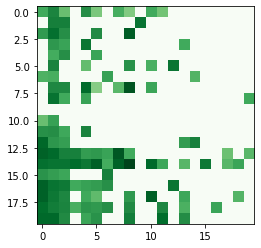

In [145]:
nx = 20
ny = 20

hist2d, x_edges, y_edges = np.histogram2d(bldgs['Agency Code'], 
                                              bldgs['Congress Dist'], 
                                              weights = bldgs['Square Footage'], 
                                              bins=[nx, ny])

plt.imshow(hist2d.T, cmap='Greens', norm=mpl_colors.SymLogNorm(10))

In [146]:
hist2d.shape, x_edges.shape, y_edges.shape

((20, 20), (21,), (21,))

In [147]:
# Bin centers from our edges. I should really get what these actually mean earlier next time~~
x_centers = (x_edges[:-1] + x_edges[1:])/2
y_centers = (y_edges[:-1] + y_edges[1:])/2

print("X Centers: Agency Codes", x_centers)
print("Y Centers: Congressional Districts", y_centers)

X Centers: Agency Codes [ 1.85  3.55  5.25  6.95  8.65 10.35 12.05 13.75 15.45 17.15 18.85 20.55
 22.25 23.95 25.65 27.35 29.05 30.75 32.45 34.15]
Y Centers: Congressional Districts [ 0.45  1.35  2.25  3.15  4.05  4.95  5.85  6.75  7.65  8.55  9.45 10.35
 11.25 12.15 13.05 13.95 14.85 15.75 16.65 17.55]


In [148]:
hist2d = hist2d.T

In [161]:
# Scaling X, Y and the colors.
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale() 
col_sc = bqplot.ColorScale(scheme='Greens', min=np.nanmin(hist2d), max=99999)
# This means any combination with footage over 99999 will all show up as an ultra dark green grid.

# Axis, axis everywhere.
x_ax = bqplot.Axis(scale=x_sc, label='Governmental Agency Codes')
y_ax = bqplot.Axis(scale=y_sc, label='Congressional Districts', orientation='vertical')
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')




heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=y_centers, 
                             column=x_centers, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

# Moniter the selected grid
userSelectedLabel = ipywidgets.Label()
def get_data_value(change):
    # Only 1 selection in this program
    if len(change['owner'].selected) == 1:
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        userSelectedLabel.value = 'Square Footage in selected Agency & Con Dist combination is' + str(v)
    
# Inject the function into the Heat Map so it gets called properly
heat_map.observe(get_data_value, 'selected')

# Putting the Heat Map onto the Dashboard
myDashboard = ipywidgets.VBox([userSelectedLabel, fig])
myDashboard

# Right component: Line plot

### Aside from being sort of a data exploration, creating the Line Plot in its standalone form also allows me to rearrange the dataframe ordered by "Year Acquired". This makes the subsequent steps easier.

In [160]:
#Sorted by 'Year Acquired' to simpplify the subsequent steps

from bqplot import (
    OrdinalScale, LinearScale, Bars, Lines, Axis, Figure
)
bldgs_sorted = bldgs.sort_values(by=['Year Acquired'])

x_scl = bqplot.LinearScale(min=1867, max=2020)
y_scl = bqplot.LinearScale(min = 100)

ax_xcl = bqplot.Axis(label='Year Acquired', scale=x_scl)
ax_ycl = bqplot.Axis(label='Square Footage', scale=y_scl, 
                    orientation='vertical', side='left')

year_acq_and_sf_plot_line = Lines(x=bldgs_sorted['Year Acquired'],
                                  y=bldgs_sorted['Square Footage'],
                                  scales={'x': x_scl, 'y': y_scl})
fig_line = bqplot.Figure(marks=[year_acq_and_sf_plot_line], axes=[ax_xcl, ax_ycl])
fig_line

Figure(axes=[Axis(label='Year Acquired', scale=LinearScale(max=2020.0, min=1867.0)), Axis(label='Square Footag…

# The Dashboard: Combining the Two components above

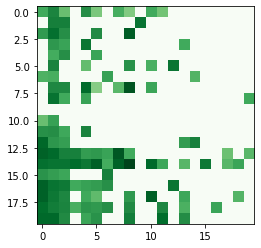

In [162]:
nx = 20
ny = 20

hist2d, x_edges, y_edges = np.histogram2d(bldgs_sorted['Agency Code'], 
                                              bldgs_sorted['Congress Dist'], 
                                              weights = bldgs_sorted['Square Footage'], 
                                              bins=[nx, ny])

x_centers = (x_edges[:-1] + x_edges[1:])/2
y_centers = (y_edges[:-1] + y_edges[1:])/2

plt.imshow(hist2d.T, cmap='Greens', norm=mpl_colors.SymLogNorm(10))

In [168]:
# 1. Initialize the label to be displayed when the user selects a grid
userSelectedLabel = ipywidgets.Label()

# 2. The Heat Map
# 2.1 Scales have an artificial max value to negate extreme outliers of Square Footage
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale() 
col_sc = bqplot.ColorScale(scheme='Greens', min=np.nanmin(hist2d), max=999999)

# 2.2 Axis to grind
x_ax = bqplot.Axis(scale=x_sc, label='Governmental Agency Codes')
y_ax = bqplot.Axis(scale=y_sc, label='Congressional Districts', orientation='vertical')
c_ax = bqplot.ColorAxis(scale=col_sc, orientation='vertical', side='right')

# 2.3 Marks which highlight user's selection
heat_map = bqplot.GridHeatMap(color=hist2d, 
                             row=y_centers, 
                             column=x_centers, 
                             scales={'color':col_sc, 'row':y_sc, 'column':x_sc},
                             interactions={'click':'select'}, 
                             anchor_style={'fill':'blue'})

# 3. The Line Plot

# 3.1 Scales: 'Year Acquired' is specified to start from 1867 (UIUC's year of founding)
# I chose this year because I believe any prior is likely bad data
x_scl = bqplot.LinearScale(min=1867, max=2020)
y_scl = bqplot.LinearScale(min = 100)

# 3.2 Axis
ax_xcl = bqplot.Axis(label='Year Acquired', scale=x_scl) # Years in integer format
ax_ycl = bqplot.Axis(label='Square Footage', scale=y_scl, 
                    orientation='vertical', side='left')

# 3.3 Marks: These are 20 in length to work with the masks below
i, j = 19, 0 
xs = [x_edges[j], x_edges[j+1]]
ys = [y_edges[i], y_edges[i+1]]

# 3.4 Region mask (I don't entirely understand how it just works, but playing along seems wiser than not)
region_mask = ( (bldgs_sorted['Congress Dist'] >= ys[0]) & (bldgs_sorted['Congress Dist'] <= ys[1]) &\
               (bldgs_sorted['Agency Code'] >= xs[0]) & (bldgs_sorted['Agency Code']<= xs[1]) )

year_acq_and_sf_plot_line = Lines(x=bldgs_sorted['Year Acquired'][region_mask],
                                  y=bldgs_sorted['Square Footage'][region_mask],
                                  scales={'x': x_scl, 'y': y_scl})


# 4. Connecting the Line Plot with the Heat Map
def get_data_value(change):
    # Only supports 1 selection at a time
    if len(change['owner'].selected) == 1:
        i,j = change['owner'].selected[0]
        v = hist2d[i,j]
        userSelectedLabel.value = 'Square Footage in selected Agency & Con Dist combination is ' + str(v)
        # Updates the Line Plot when a grid in the Heat Map is selected
        xs = [x_edges[j], x_edges[j+1]]
        ys = [y_edges[i], y_edges[i+1]]
        # Only show data in this range combination of Congress Dist (y) and Agency Code (x)
        region_mask = ( (bldgs_sorted['Congress Dist'] >= ys[0]) & (bldgs_sorted['Congress Dist'] <= ys[1]) &\
                       (bldgs_sorted['Agency Code'] >= xs[0]) & (bldgs_sorted['Agency Code']<= xs[1]) )
        # The Line Plot, of course, has to have binning supported
        year_acq_and_sf_plot_line.x = bldgs_sorted['Year Acquired'][region_mask]
        year_acq_and_sf_plot_line.y = bldgs_sorted['Square Footage'][region_mask]
          
# Use the function above to moniter user selection
heat_map.observe(get_data_value, 'selected')

fig_heatmap = bqplot.Figure(marks=[heat_map], axes=[c_ax, y_ax, x_ax])
fig_sqr_ft = bqplot.Figure(marks=[year_acq_and_sf_plot_line], axes=[ax_xcl, ax_ycl])

fig_heatmap.layout.min_width= '500px'
fig_sqr_ft.layout.min_width = '500px'

plots = ipywidgets.HBox([fig_heatmap, fig_sqr_ft])
myDashboard = ipywidgets.VBox([userSelectedLabel, plots])
myDashboard

# Writeup

As demonstrated above, the linkage between the Heat Map and the Line Plot works as is. 

I was somewhat able to keep the x range static on the Line Plot, as it simply enforced upon initialization. However, the y range constantly changes as each combination of Gonvernmental Agency and Congressional District can have very different square footages. The line plot seems capable of adjusting itself to ensure the lines plotted stay reasonably scaled. In this scenario, it may feel more like a feature than a bug.

It is worth mentioning that a maximum value of 999999 was arbitrarily added because using np.nanmax() would have had the color scale skewed by certain outliers with footages in millions, making the heat map almost white and visually tasteless. These outliers are among the dark green grids in the heat map.

In terms of changing style, the colormap in the Heat Map can be easily changed by simply swapping out the "scheme" parameter in the "col_sc = bqplot.ColorScale()" variable. The width of both components of this dashboard can also be changed. Beyond that, "marker_str" is also a parameter that can be used to alter the style of the Plot Line. 

Regardless, I notice that there are multiple grids which contain irrelevant "Year Acquired" data which makes the Line Plot occasionally empty when these grids are selected. It could be bad data or my methods of parsing them being sloppy.

On a side note, this visualizaton needs an improvement which allows either axis to parse non-numerical data. Currently, the categorical data that is "Agency Name" is essentially replaced by a newly created "Agency Code" which is, in my opinion, a borderline data loss. At the very least, any user of this data would have to refer to the table above to know what an Agency Code refers to (for instance, 7 refers to 'Department of Agriculture').

Reviewing the entire workflow, I cannot overstate the importance of the 2D Histogram (which is not part of the Dashboard). In the backstage, it prepares the data and store them in multi-dimensional arrays which are the easiest to understand for the Heat Map. Without first creating it, the Heat Map will be a lot more challenging to create. There is also the approach of using pandas' groupby() methods to condense the dataframe (essentially creating a new one where rows of the same Agency Name & Congress Dist combination are viewed as one row) which I briefly explored before deciding that associating numerical indices with each Agency is more preferable.

This concludes my response to Homework 6.